In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_regions(clf, X, y):
    xx1, xx2 = np.meshgrid(np.arange(0, 12, 0.1),
                           np.arange(0, 12, 0.1))
    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))

    plt.scatter(x=X[y == 0, 0], y=X[y == 0, 1], alpha=0.8, c='red')
    plt.scatter(x=X[y == 1, 0], y=X[y == 1, 1], alpha=0.8, c='blue')

In [2]:
import pandas as pd
# 1. データの読み込み
df = pd.read_csv('./input/data(1).csv')
df.head(3)

,x0,x1,y
0,2.413141,1.166672,0.0
1,4.983929,2.296247,0.0
2,3.402277,3.142005,0.0


In [3]:
# 2. 説明変数（X）と目的変数（y）の取得
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

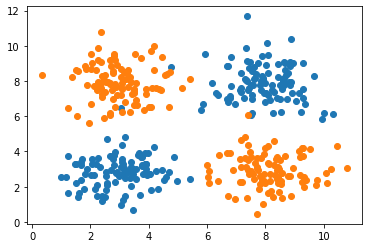

In [4]:
# 3. データのプロット
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1])
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1]);

In [5]:
from sklearn.model_selection import train_test_split
# 4. トレーニング・テスト用にデータを分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [6]:
from sklearn.svm import SVC
# 5. モデル作成とトレーニングデータの学習
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)

SVC(gamma='auto')

In [7]:
# 6. テストデータでスコア算出
svm.score(X_test, y_test)

0.9916666666666667

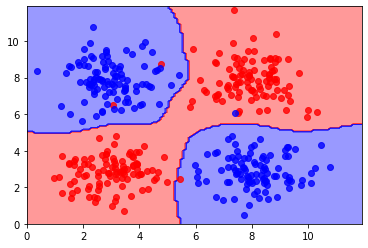

In [8]:
# 7. 学習した領域のプロット
plot_regions(svm, X, y);